In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D202.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  object 
 7   NOTES       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 4.3+ MB


In [5]:
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [6]:
# check data information

# Type: only value is "electric usage"
# date not in datetime format
# start / end time: in hh:mm format but not datetime
# maybe good idea to calculate duratio
# units: only value "kWh"
# cost: metric scaled variable is in string format
for feat in df.select_dtypes(exclude="number"):
    print("-----------------")
    print("{}\n".format(feat))
    print("{}\n".format(df[feat].value_counts()))

-----------------
TYPE

Electric usage    70368
Name: TYPE, dtype: int64

-----------------
DATE

11/6/2016     100
11/5/2017     100
8/1/2018       96
4/7/2018       96
12/26/2016     96
             ... 
5/25/2017      96
1/3/2017       96
11/4/2017      96
3/12/2017      92
3/11/2018      92
Name: DATE, Length: 733, dtype: int64

-----------------
START TIME

1:00    735
1:15    735
1:30    735
1:45    735
4:45    733
       ... 
5:15    733
2:00    731
2:15    731
2:45    731
2:30    731
Name: START TIME, Length: 96, dtype: int64

-----------------
END TIME

1:29     735
1:44     735
1:59     735
1:14     735
10:44    733
        ... 
23:59    733
2:59     731
2:14     731
2:44     731
2:29     731
Name: END TIME, Length: 96, dtype: int64

-----------------
UNITS

kWh    70368
Name: UNITS, dtype: int64

-----------------
COST

$0.01     30204
$0.00     13440
$0.02      9806
$0.03      4126
$0.04      2608
$0.06      2074
$0.05      1848
$0.07      1580
$0.08      1294
$0.09       7

In [7]:
# NOTES is missing 100 %
df.isnull().sum() / df.shape[0]

TYPE          0.0
DATE          0.0
START TIME    0.0
END TIME      0.0
USAGE         0.0
UNITS         0.0
COST          0.0
NOTES         1.0
dtype: float64

In [8]:
# Data Processing and Cleaning

In [9]:
# Show the categorical data 
# type and unit missing because it has only one value
categorical_feat = df.select_dtypes(exclude="number")
pd.concat([categorical_feat.head(),categorical_feat.tail()],axis=0)

,TYPE,DATE,START TIME,END TIME,UNITS,COST
0,Electric usage,10/22/2016,0:00,0:14,kWh,$0.00
1,Electric usage,10/22/2016,0:15,0:29,kWh,$0.00
2,Electric usage,10/22/2016,0:30,0:44,kWh,$0.00
3,Electric usage,10/22/2016,0:45,0:59,kWh,$0.00
4,Electric usage,10/22/2016,1:00,1:14,kWh,$0.00
70363,Electric usage,10/24/2018,22:45,22:59,kWh,$0.00
70364,Electric usage,10/24/2018,23:00,23:14,kWh,$0.01
70365,Electric usage,10/24/2018,23:15,23:29,kWh,$0.01
70366,Electric usage,10/24/2018,23:30,23:44,kWh,$0.01
70367,Electric usage,10/24/2018,23:45,23:59,kWh,$0.01


In [10]:
# Drop Type and Units
categorical_feat.drop(["TYPE","UNITS"],axis=1,inplace=True)

/home/adebowale/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# Transform date, start time and end time to datetime
categorical_feat["START"] = pd.to_datetime(categorical_feat["DATE"]+ ' '+categorical_feat["START TIME"],format="%m/%d/%Y %H:%M")
categorical_feat["END"] = pd.to_datetime(categorical_feat["DATE"]+ ' '+categorical_feat["END TIME"],format="%m/%d/%Y %H:%M")

<ipython-input-11-55fb1bac8498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_feat["START"] = pd.to_datetime(categorical_feat["DATE"]+ ' '+categorical_feat["START TIME"],format="%m/%d/%Y %H:%M")
<ipython-input-11-55fb1bac8498>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_feat["END"] = pd.to_datetime(categorical_feat["DATE"]+ ' '+categorical_feat["END TIME"],format="%m/%d/%Y %H:%M")


In [12]:
categorical_feat.drop(["DATE","START TIME","END TIME"],axis=1,inplace=True)

In [13]:
categorical_feat["year"] = categorical_feat.apply(lambda x: x["START"].year,axis=1)
categorical_feat["month"] = categorical_feat.apply(lambda x: x["START"].month,axis=1)
categorical_feat["day"] = categorical_feat.apply(lambda x: x["START"].day,axis=1)
categorical_feat["hour"] = categorical_feat.apply(lambda x: x["START"].hour,axis=1)

<ipython-input-13-b3880bd46ec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_feat["year"] = categorical_feat.apply(lambda x: x["START"].year,axis=1)
<ipython-input-13-b3880bd46ec0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_feat["month"] = categorical_feat.apply(lambda x: x["START"].month,axis=1)
<ipython-input-13-b3880bd46ec0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [14]:
categorical_feat

,COST,START,END,year,month,day,hour
0,$0.00,2016-10-22 00:00:00,2016-10-22 00:14:00,2016,10,22,0
1,$0.00,2016-10-22 00:15:00,2016-10-22 00:29:00,2016,10,22,0
2,$0.00,2016-10-22 00:30:00,2016-10-22 00:44:00,2016,10,22,0
3,$0.00,2016-10-22 00:45:00,2016-10-22 00:59:00,2016,10,22,0
4,$0.00,2016-10-22 01:00:00,2016-10-22 01:14:00,2016,10,22,1
...,...,...,...,...,...,...,...
70363,$0.00,2018-10-24 22:45:00,2018-10-24 22:59:00,2018,10,24,22
70364,$0.01,2018-10-24 23:00:00,2018-10-24 23:14:00,2018,10,24,23
70365,$0.01,2018-10-24 23:15:00,2018-10-24 23:29:00,2018,10,24,23
70366,$0.01,2018-10-24 23:30:00,2018-10-24 23:44:00,2018,10,24,23


In [15]:
# transform cost to float
categorical_feat["COST"] = categorical_feat["COST"].apply(lambda x: float(x[1:]))


<ipython-input-15-d77eedd367ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_feat["COST"] = categorical_feat["COST"].apply(lambda x: float(x[1:]))


In [16]:
# Calculate duration
categorical_feat["duration"] = (categorical_feat["END"] - categorical_feat["START"])

In [17]:
categorical_feat

,COST,START,END,year,month,day,hour,duration
0,0.00,2016-10-22 00:00:00,2016-10-22 00:14:00,2016,10,22,0,0 days 00:14:00
1,0.00,2016-10-22 00:15:00,2016-10-22 00:29:00,2016,10,22,0,0 days 00:14:00
2,0.00,2016-10-22 00:30:00,2016-10-22 00:44:00,2016,10,22,0,0 days 00:14:00
3,0.00,2016-10-22 00:45:00,2016-10-22 00:59:00,2016,10,22,0,0 days 00:14:00
4,0.00,2016-10-22 01:00:00,2016-10-22 01:14:00,2016,10,22,1,0 days 00:14:00
...,...,...,...,...,...,...,...,...
70363,0.00,2018-10-24 22:45:00,2018-10-24 22:59:00,2018,10,24,22,0 days 00:14:00
70364,0.01,2018-10-24 23:00:00,2018-10-24 23:14:00,2018,10,24,23,0 days 00:14:00
70365,0.01,2018-10-24 23:15:00,2018-10-24 23:29:00,2018,10,24,23,0 days 00:14:00
70366,0.01,2018-10-24 23:30:00,2018-10-24 23:44:00,2018,10,24,23,0 days 00:14:00


In [18]:
# join cat and numerical data
df_trans = pd.concat([categorical_feat, df["USAGE"]], axis = 1)

In [19]:
# Data Analysis on df_trans
df_trans

,COST,START,END,year,month,day,hour,duration,USAGE
0,0.00,2016-10-22 00:00:00,2016-10-22 00:14:00,2016,10,22,0,0 days 00:14:00,0.01
1,0.00,2016-10-22 00:15:00,2016-10-22 00:29:00,2016,10,22,0,0 days 00:14:00,0.01
2,0.00,2016-10-22 00:30:00,2016-10-22 00:44:00,2016,10,22,0,0 days 00:14:00,0.01
3,0.00,2016-10-22 00:45:00,2016-10-22 00:59:00,2016,10,22,0,0 days 00:14:00,0.01
4,0.00,2016-10-22 01:00:00,2016-10-22 01:14:00,2016,10,22,1,0 days 00:14:00,0.01
...,...,...,...,...,...,...,...,...,...
70363,0.00,2018-10-24 22:45:00,2018-10-24 22:59:00,2018,10,24,22,0 days 00:14:00,0.02
70364,0.01,2018-10-24 23:00:00,2018-10-24 23:14:00,2018,10,24,23,0 days 00:14:00,0.03
70365,0.01,2018-10-24 23:15:00,2018-10-24 23:29:00,2018,10,24,23,0 days 00:14:00,0.03
70366,0.01,2018-10-24 23:30:00,2018-10-24 23:44:00,2018,10,24,23,0 days 00:14:00,0.03


In [20]:
print("first data point in time, START TIME: {}".format(df_trans["START"].min()))
print("last data point in time, START TIME: {}".format(df_trans["START"].max()))
print("\n")
print("first data point in time, END TIME: {}".format(df_trans["END"].min()))
print("last data point in time, END TIME: {}".format(df_trans["END"].max()))

first data point in time, START TIME: 2016-10-22 00:00:00
last data point in time, START TIME: 2018-10-24 23:45:00


first data point in time, END TIME: 2016-10-22 00:14:00
last data point in time, END TIME: 2018-10-24 23:59:00


In [21]:
# How much energy is consumed on average
df_trans["duration"].value_counts()

0 days 00:14:00    70368
Name: duration, dtype: int64

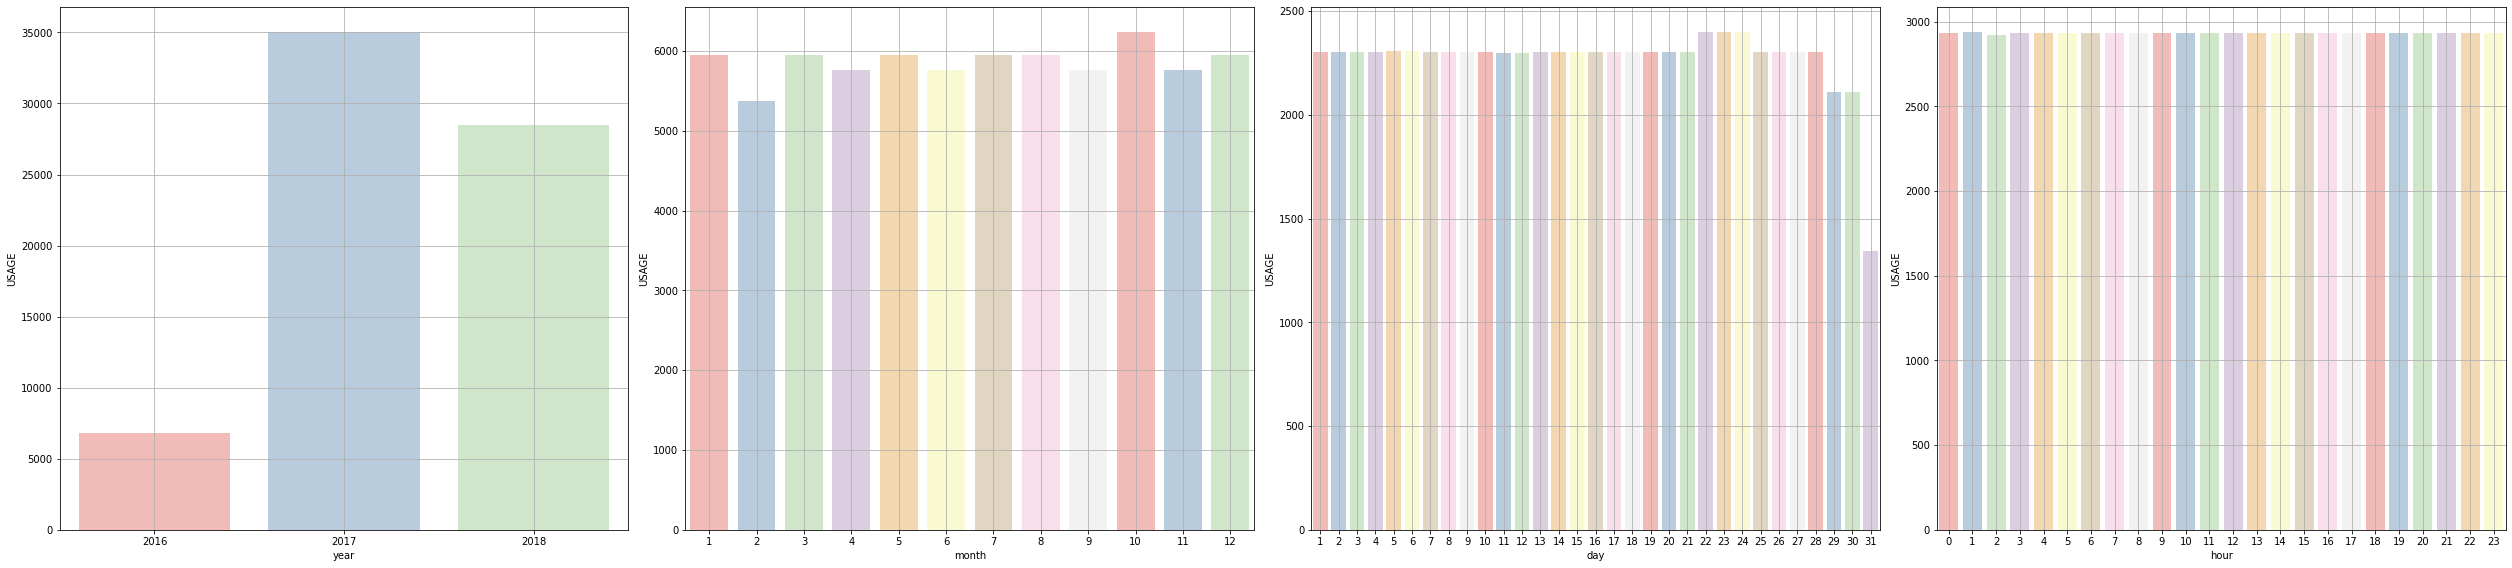

In [22]:
# how are the values distributed on years, month, days, hours?
# not many values from 2016
# values equally distributed between month, day and hour
fig,sub = plt.subplots(1,4,figsize=(35,8))
year_count = df_trans.groupby("year")["USAGE"].count()
month_count = df_trans.groupby("month")["USAGE"].count()
day_count = df_trans.groupby("day")["USAGE"].count()
hour_count = df_trans.groupby("hour")["USAGE"].count()

for feat, subplot in zip([year_count, month_count,day_count, hour_count],sub):
    sns.barplot(x=feat.index, y=feat, ax=subplot,palette="Pastel1")
    subplot.grid()
fig.tight_layout()


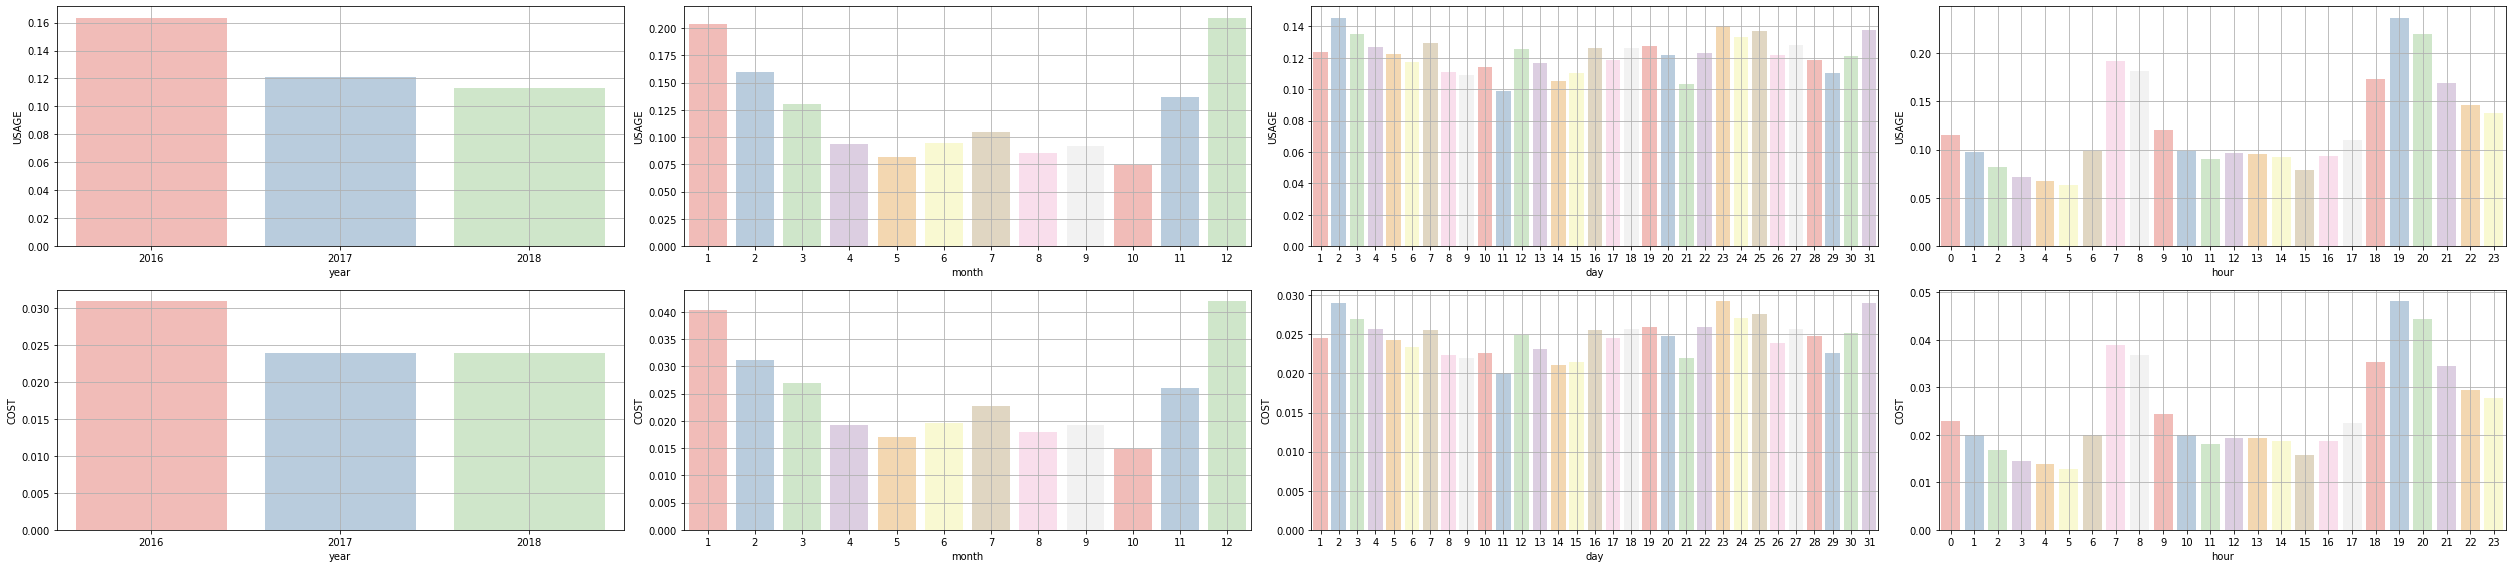

In [23]:
# is the energy consumption on average different depending on the year, month, day or hour?
# from 2016 to 2018 the energy consumption has on average been reduced (hypothesis: better isolation and more responsibility?)
# in the winter month Nov - March the energy consumption is higher than in the summer month
# no difference observable between days observable
# higher energy consumption from 19 to 23 h (evening activities?) and 7 - 8 h (rush hour to work?)
fig,sub = plt.subplots(2,4,figsize=(35,8))
year_usage_mean = df_trans.groupby("year")["USAGE"].mean()
month_usage_mean = df_trans.groupby("month")["USAGE"].mean()
day_usage_mean = df_trans.groupby("day")["USAGE"].mean()
hour_usage_mean = df_trans.groupby("hour")["USAGE"].mean()

year_cost_mean = df_trans.groupby("year")["COST"].mean()
month_cost_mean = df_trans.groupby("month")["COST"].mean()
day_cost_mean = df_trans.groupby("day")["COST"].mean()
hour_cost_mean = df_trans.groupby("hour")["COST"].mean()

list_mean = [year_usage_mean, month_usage_mean,day_usage_mean,hour_usage_mean,year_cost_mean,month_cost_mean,day_cost_mean,hour_cost_mean]

for feat, subplot in zip(list_mean,sub.flatten()):
    sns.barplot(x=feat.index, y=feat, ax=subplot,palette="Pastel1")
    subplot.grid()
fig.tight_layout()


In [24]:
# Average yearly usage
df_trans.groupby("year")["USAGE"].mean()

year
2016    0.163413
2017    0.120879
2018    0.113324
Name: USAGE, dtype: float64

In [25]:
# Average monthly usage
df_trans.groupby("month")["USAGE"].mean()

month
1     0.203555
2     0.159554
3     0.130498
4     0.093493
5     0.082151
6     0.094736
7     0.104839
8     0.085867
9     0.091715
10    0.074564
11    0.136546
12    0.209395
Name: USAGE, dtype: float64

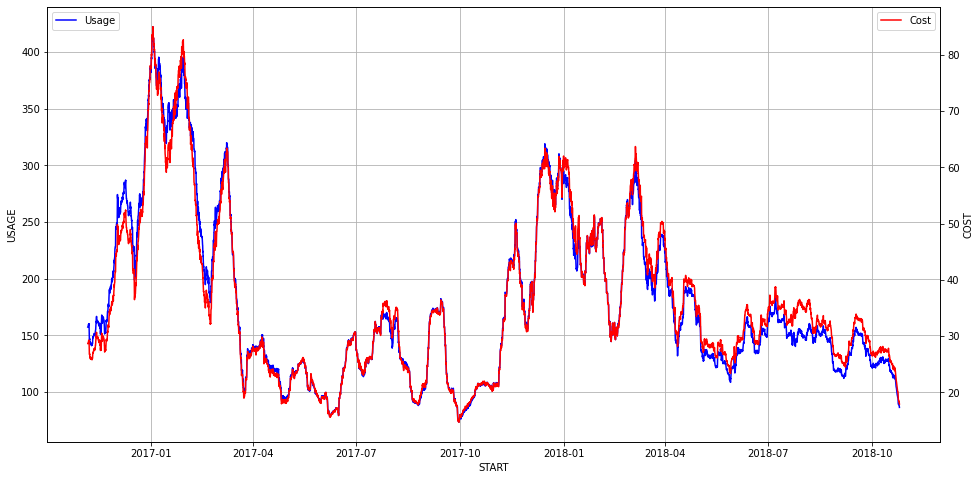

In [26]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = df_trans["START"], y = df_trans["USAGE"].rolling(window=1440).sum(),ax = sub, color="blue", label = "Usage");
sns.lineplot(x = df_trans["START"], y = df_trans["COST"].rolling(window=1440).sum(),ax = sub2, color="red", label = "Cost");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [27]:
# Weekends and Holidays analysis

In [28]:
# Create column for weekends (0) or weekday (1)
df_trans["DAY_TYPE"] = df_trans.END.apply(lambda x: 1 if x.dayofweek > 5 else 0)

In [29]:
df_trans

,COST,START,END,year,month,day,hour,duration,USAGE,DAY_TYPE
0,0.00,2016-10-22 00:00:00,2016-10-22 00:14:00,2016,10,22,0,0 days 00:14:00,0.01,0
1,0.00,2016-10-22 00:15:00,2016-10-22 00:29:00,2016,10,22,0,0 days 00:14:00,0.01,0
2,0.00,2016-10-22 00:30:00,2016-10-22 00:44:00,2016,10,22,0,0 days 00:14:00,0.01,0
3,0.00,2016-10-22 00:45:00,2016-10-22 00:59:00,2016,10,22,0,0 days 00:14:00,0.01,0
4,0.00,2016-10-22 01:00:00,2016-10-22 01:14:00,2016,10,22,1,0 days 00:14:00,0.01,0
...,...,...,...,...,...,...,...,...,...,...
70363,0.00,2018-10-24 22:45:00,2018-10-24 22:59:00,2018,10,24,22,0 days 00:14:00,0.02,0
70364,0.01,2018-10-24 23:00:00,2018-10-24 23:14:00,2018,10,24,23,0 days 00:14:00,0.03,0
70365,0.01,2018-10-24 23:15:00,2018-10-24 23:29:00,2018,10,24,23,0 days 00:14:00,0.03,0
70366,0.01,2018-10-24 23:30:00,2018-10-24 23:44:00,2018,10,24,23,0 days 00:14:00,0.03,0


In [30]:
# Add holidays colums
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start = df_trans.END.min(), end = df_trans.END.max())
df_trans["IS_HOLIDAY"] = df_trans.END.isin(holidays)
df_trans.IS_HOLIDAY = df_trans.IS_HOLIDAY.astype("int")

In [31]:
df_trans

,COST,START,END,year,month,day,hour,duration,USAGE,DAY_TYPE,IS_HOLIDAY
0,0.00,2016-10-22 00:00:00,2016-10-22 00:14:00,2016,10,22,0,0 days 00:14:00,0.01,0,0
1,0.00,2016-10-22 00:15:00,2016-10-22 00:29:00,2016,10,22,0,0 days 00:14:00,0.01,0,0
2,0.00,2016-10-22 00:30:00,2016-10-22 00:44:00,2016,10,22,0,0 days 00:14:00,0.01,0,0
3,0.00,2016-10-22 00:45:00,2016-10-22 00:59:00,2016,10,22,0,0 days 00:14:00,0.01,0,0
4,0.00,2016-10-22 01:00:00,2016-10-22 01:14:00,2016,10,22,1,0 days 00:14:00,0.01,0,0
...,...,...,...,...,...,...,...,...,...,...,...
70363,0.00,2018-10-24 22:45:00,2018-10-24 22:59:00,2018,10,24,22,0 days 00:14:00,0.02,0,0
70364,0.01,2018-10-24 23:00:00,2018-10-24 23:14:00,2018,10,24,23,0 days 00:14:00,0.03,0,0
70365,0.01,2018-10-24 23:15:00,2018-10-24 23:29:00,2018,10,24,23,0 days 00:14:00,0.03,0,0
70366,0.01,2018-10-24 23:30:00,2018-10-24 23:44:00,2018,10,24,23,0 days 00:14:00,0.03,0,0


<ipython-input-32-213f30ad3c0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xmas_week16['xmas'] = xmas_week16.END.dt.strftime('%b-%d, %H:%M')
<ipython-input-32-213f30ad3c0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xmas_week17['xmas'] = xmas_week17.END.dt.strftime('%b-%d, %H:%M')


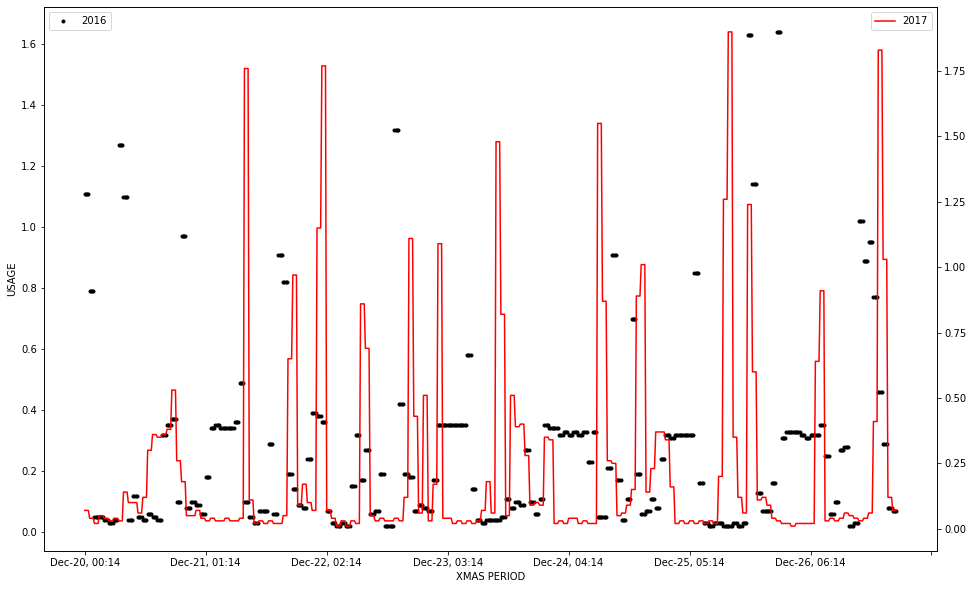

In [32]:
# Plot 2016 Xmas and 2017 Xmas

xmas_2016 = (df_trans.END >= pd.to_datetime("12/20/2016")) & (df_trans.END <= pd.to_datetime("12/27/2016"))
xmas_week16 = df_trans.loc[xmas_2016]
xmas_week16['xmas'] = xmas_week16.END.dt.strftime('%b-%d, %H:%M')

xmas_2017 = (df_trans.END >= pd.to_datetime("12/20/2017")) & (df_trans.END <= pd.to_datetime("12/27/2017"))
xmas_week17 = df_trans.loc[xmas_2017]
xmas_week17['xmas'] = xmas_week17.END.dt.strftime('%b-%d, %H:%M')

ax = xmas_week16.plot(x="xmas", y="USAGE", figsize=(16, 10), style='k.')
ax.set_xlabel("XMAS PERIOD")
ax.set_ylabel("USAGE")
ax2 = ax.twinx()
xmas_week17.plot(x="xmas", y="USAGE", ax=ax2, color="r", figsize=(16, 10))
ax.legend(["2016"], loc="upper left")
ax2.legend(["2017"], loc="upper right")
plt.show()


<ipython-input-33-79528e9a7c69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny2017['new_year'] = ny2017.END.dt.strftime('%H:%M')
<ipython-input-33-79528e9a7c69>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny2018['new_year'] = ny2018.END.dt.strftime('%H:%M')


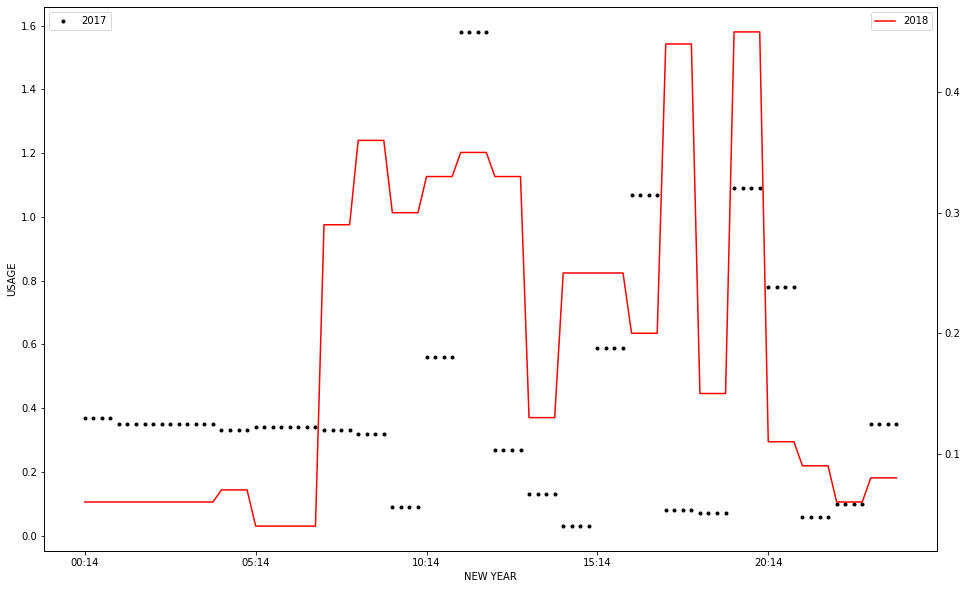

In [33]:
# Plot 2017 NewYear and 2018 NewYear

ny2017 = (df_trans.END >= pd.to_datetime("01/01/2017")) & (df_trans.END < pd.to_datetime("01/02/2017"))
ny2017 = df_trans.loc[ny2017]
ny2017['new_year'] = ny2017.END.dt.strftime('%H:%M')

ny2018 = (df_trans.END >= pd.to_datetime("01/01/2018")) & (df_trans.END < pd.to_datetime("01/02/2018"))
ny2018 = df_trans.loc[ny2018]
ny2018['new_year'] = ny2018.END.dt.strftime('%H:%M')

ax = ny2017.plot(x="new_year", y="USAGE", figsize=(16, 10), style='k.')
ax.set_xlabel("NEW YEAR")
ax.set_ylabel("USAGE")
ax2 = ax.twinx()
ny2018.plot(x="new_year", y="USAGE", ax=ax2, color="r", figsize=(16, 10))
ax.legend(["2017"], loc="upper left")
ax2.legend(["2018"], loc="upper right")
plt.show()

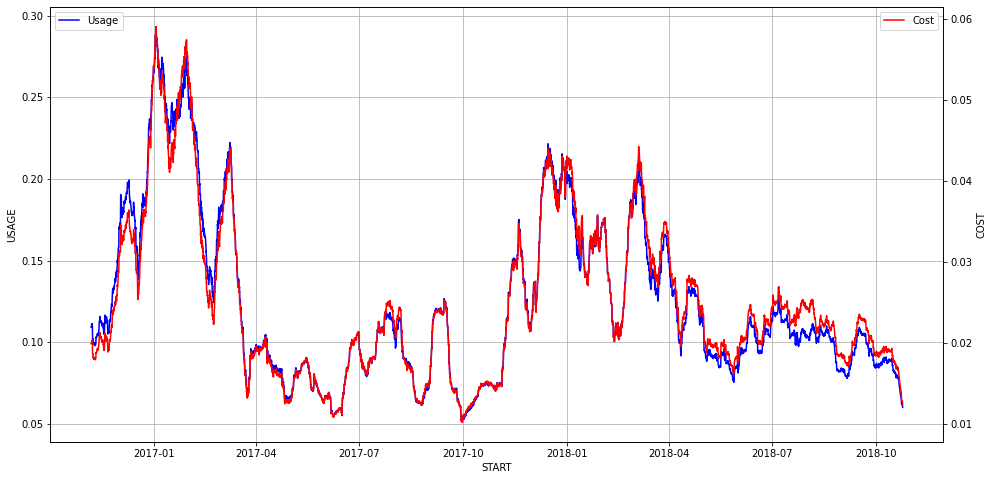

In [34]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = df_trans["START"], y = df_trans["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Usage");
sns.lineplot(x = df_trans["START"], y = df_trans["COST"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Cost");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [35]:
# PART 2

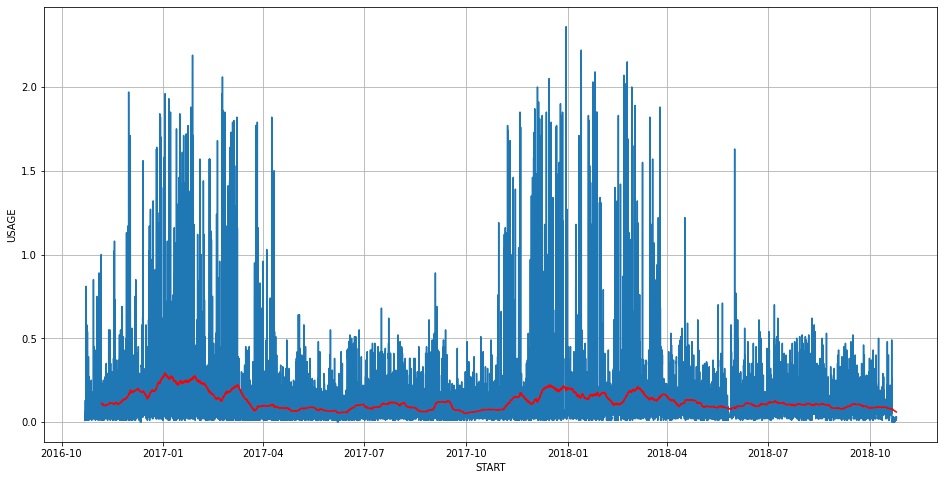

In [36]:
# Understanding the Pattern
# From the above, we can observe that there is a seasonality associated with the data.
# Every year there is a spike in increasing usage from November to March.

fig, sub = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x = df_trans["START"], y = df_trans["USAGE"], ax = sub)
sns.lineplot(x = df_trans["START"], y = df_trans["USAGE"].rolling(window=1440).mean(),ax = sub, color="red");
sub.grid()

In [37]:
# Test for Stationarity
# Stationarity is an important concept in time-series and any time-series data should undergo a stationarity test before proceeding with a model.
# We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not which is available in the ‘pmdarima’ package.

from pmdarima.arima import ADFTest

usage_df = df_trans[['START', 'USAGE']]
usage_df.set_index('START', inplace=True)

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(usage_df)

# From the above, we can conclude that the data is non-stationary.
# Hence, we would need to use the “Integrated (I)” concept,
# denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

(0.01, False)

In [38]:
# Split Data into Different Test and Train Data Percentage
def get_train_val_test(x, full=False):
    half_end_date = "23/10/2017"
    percent = {66: "17/2/2018", 70: "19/3/2018", 75: "24/4/2018", 80: "31/5/2018"}
    percent_half = {66: "20/6/2017", 70: "13/07/2017", 75: "23/07/2017", 80: "13/08/2017"}
    
    # change as desired to another percetage in percent dict
    date = percent[x] if full else percent_half[x]
    pd_date = pd.to_datetime(date)
    training_data = df_trans[df_trans.START < pd_date]
    
    offset = pd_date + pd.DateOffset(1)
    val_mask = (df_trans.START >= pd_date) & (df_trans.START < offset)
    val_data = df_trans.loc[val_mask]
    
    if full:
        test_data = df_trans[df_trans.START >= offset]
    else:
        test_dat = (df_trans.START >= offset) & (df_trans.START <= pd.to_datetime(half_end_date))
        test_data = df_trans.loc[test_dat]
    return training_data, val_data, test_data

In [39]:
# Visualisation of the test and train data

def visualise_test_train(training_data, test_data):
    fig, sub = plt.subplots(1,1,figsize=(16,8))
    sns.lineplot(x = training_data["START"], y = training_data["USAGE"], ax = sub, label = "Train")
    sns.lineplot(x = test_data["START"], y = test_data["USAGE"],ax = sub, color="red", label = "Test");
    sub.grid()

In [40]:
# RandomForest

In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [46]:
def apply_random_forest(training_data, val_data, test_data):
    x_train,y_train = training_data.drop(["USAGE", "START", "END", "year", "month", "day", "hour", "duration"],axis=1), training_data.USAGE
    x_test,y_test = test_data.drop(["USAGE", "START", "END", "year", "month", "day", "hour", "duration"],axis=1), test_data.USAGE
    x_val,y_val = val_data.drop(["USAGE", "START", "END", "year", "month", "day", "hour", "duration"],axis=1), val_data.USAGE
    print(x_train)
    scaler = StandardScaler()
    rfr  = RandomForestRegressor(random_state=2017,verbose=2,n_jobs=5)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    x_val_scaled = scaler.fit_transform(x_val)
    rfr.fit(x_train_scaled,y_train)

    return rfr, x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled

In [47]:
# ANALYSIS FOR 66% OF DATASET AS TRAIN DATA
training_data66, val_data66, test_data66 = get_train_val_test(66, True)

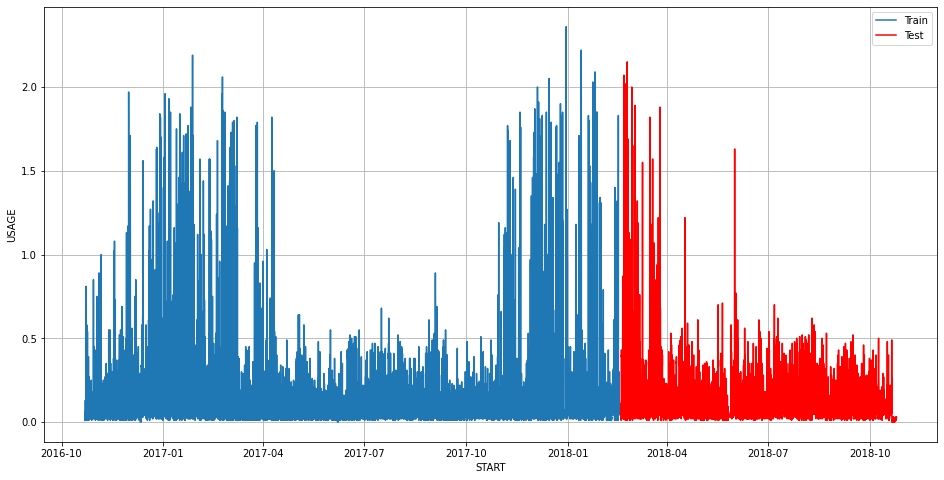

In [48]:
visualise_test_train(training_data66, test_data66)

In [49]:
rfr, x_train66,y_train66,x_test66,y_test66,x_val66,y_val66,x_train_scaled66,x_test_scaled66,x_val_scaled66 = apply_random_forest(training_data66, val_data66, test_data66)
rfr.fit(x_train_scaled66,y_train66)

       COST  DAY_TYPE  IS_HOLIDAY
0      0.00         0           0
1      0.00         0           0
2      0.00         0           0
3      0.00         0           0
4      0.00         0           0
...     ...       ...         ...
46367  0.01         0           0
46368  0.01         0           0
46369  0.01         0           0
46370  0.01         0           0
46371  0.01         0           0

[46372 rows x 3 columns]
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100building tree 19 of 100

building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100building tree 60 of 100

building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100building tree 71 of 100

building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100building tree 33 of 100

building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

In [50]:
rfr.score(x_val66,y_val66)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


0.07115471291036013

In [51]:
rfr.score(x_test66,y_test66)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


-0.03985555975482935

In [52]:
test_data66["RF_PREDICTED"] = rfr.predict(x_test_scaled66)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-52-70fe422b5723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data66["RF_PREDICTED"] = rfr.predict(x_test_scaled66)


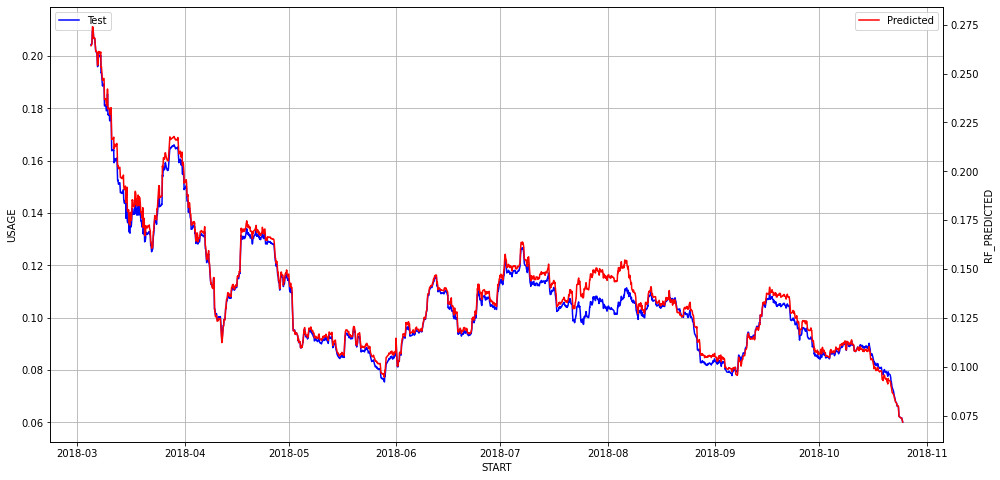

In [53]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data66["START"], y = test_data66["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data66["START"], y = test_data66["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [54]:
val_data66["RF_PREDICTED"] = rfr.predict(x_val_scaled66)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-54-0ccf55a41e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data66["RF_PREDICTED"] = rfr.predict(x_val_scaled66)


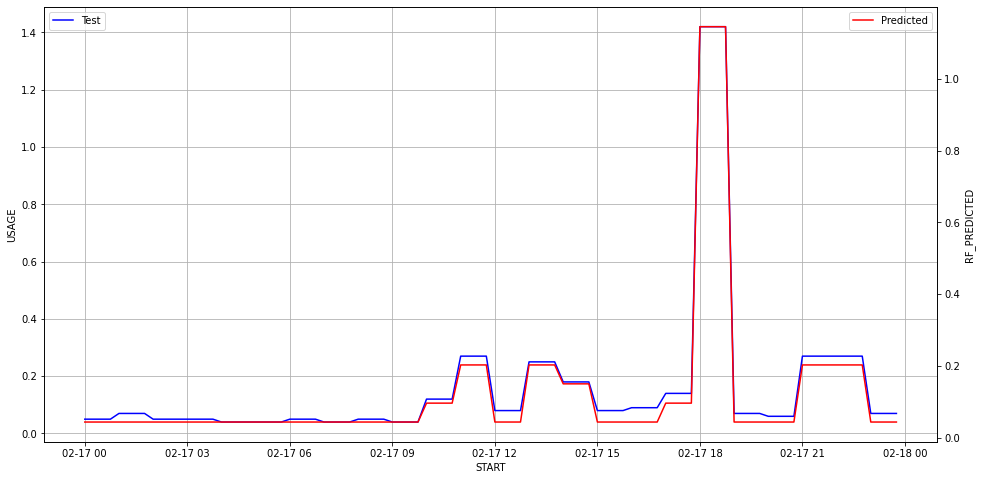

In [55]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data66["START"], y = val_data66["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data66["START"], y = val_data66["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [56]:
from math import sqrt
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data66.USAGE, test_data66.RF_PREDICTED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data66.USAGE, val_data66.RF_PREDICTED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data66.USAGE, test_data66.RF_PREDICTED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data66.USAGE, val_data66.RF_PREDICTED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data66.USAGE, test_data66.RF_PREDICTED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data66.USAGE, val_data66.RF_PREDICTED))

RMSE FOR TESTDATA 0.07366879539952277
RMSE FOR SINGLE TEST HORIZON 0.06528266412184405
MAE FOR TESTDATA 0.03732352076539422
MAE FOR SINGLE TEST HORIZON 0.036770816153434464
MAPE FOR TESTDATA 265661707655.30698
MAPE FOR SINGLE TEST HORIZON 0.23467428015461778


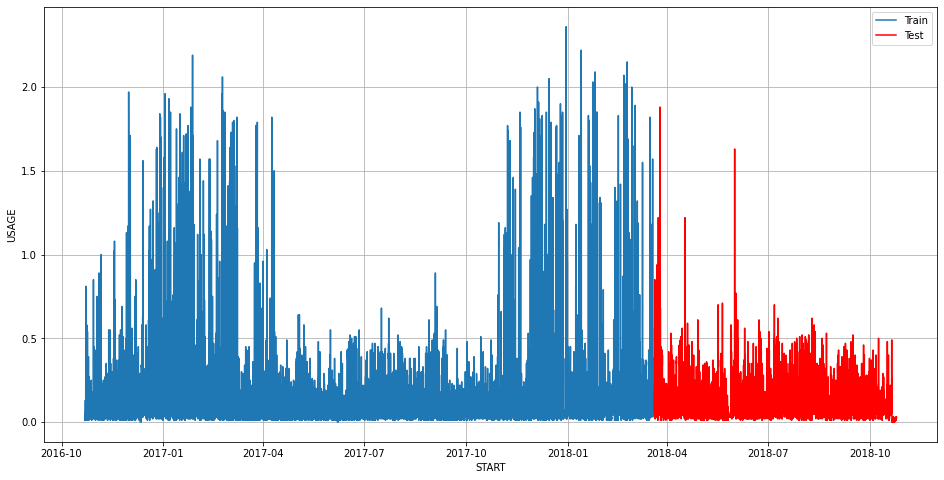

In [57]:
# ANALYSIS FOR 70% OF DATASET AS TRAIN DATA
training_data70, val_data70, test_data70 = get_train_val_test(70, True)
visualise_test_train(training_data70, test_data70)

In [58]:
rfr, x_train70,y_train70,x_test70,y_test70,x_val70,y_val70,x_train_scaled70,x_test_scaled70,x_val_scaled70 = apply_random_forest(training_data70, val_data70, test_data70)
rfr.fit(x_train_scaled70,y_train70)

       COST  DAY_TYPE  IS_HOLIDAY
0      0.00         0           0
1      0.00         0           0
2      0.00         0           0
3      0.00         0           0
4      0.00         0           0
...     ...       ...         ...
49243  0.02         1           0
49244  0.01         1           0
49245  0.01         1           0
49246  0.01         1           0
49247  0.01         1           0

[49248 rows x 3 columns]
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100building tree 24 of 100


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100building tree 54 of 100

building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-59-d76878ff64b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data70["RF_PREDICTED"] = rfr.predict(

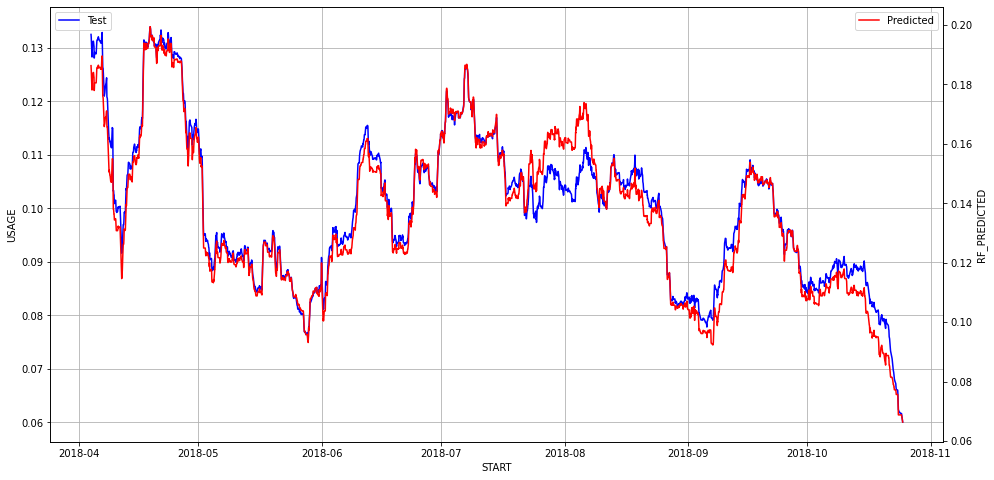

In [59]:
rfr.score(x_val70,y_val70)
rfr.score(x_test70,y_test70)
test_data70["RF_PREDICTED"] = rfr.predict(x_test_scaled70)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data70["START"], y = test_data70["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data70["START"], y = test_data70["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-60-2b5d1c53d009>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data70["RF_PREDICTED"] = rfr.predict(x_val_scaled70)


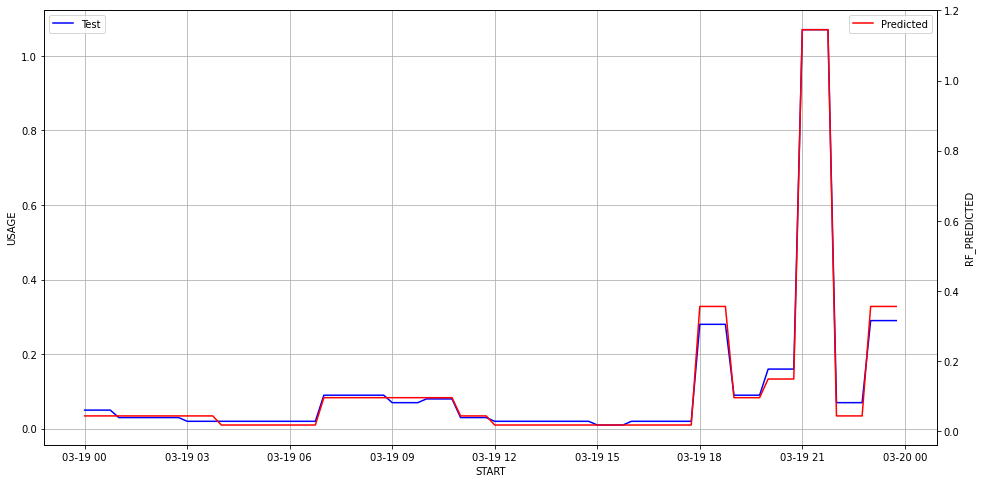

In [60]:
val_data70["RF_PREDICTED"] = rfr.predict(x_val_scaled70)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data70["START"], y = val_data70["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data70["START"], y = val_data70["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [61]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data70.USAGE, test_data70.RF_PREDICTED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data70.USAGE, val_data70.RF_PREDICTED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data70.USAGE, test_data70.RF_PREDICTED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data70.USAGE, val_data70.RF_PREDICTED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data70.USAGE, test_data70.RF_PREDICTED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data70.USAGE, val_data70.RF_PREDICTED))

RMSE FOR TESTDATA 0.1193588929149355
RMSE FOR SINGLE TEST HORIZON 0.028006469017905225
MAE FOR TESTDATA 0.06155070660376292
MAE FOR SINGLE TEST HORIZON 0.017087884551002196
MAPE FOR TESTDATA 302471270832.9505
MAPE FOR SINGLE TEST HORIZON 0.2560972068285552


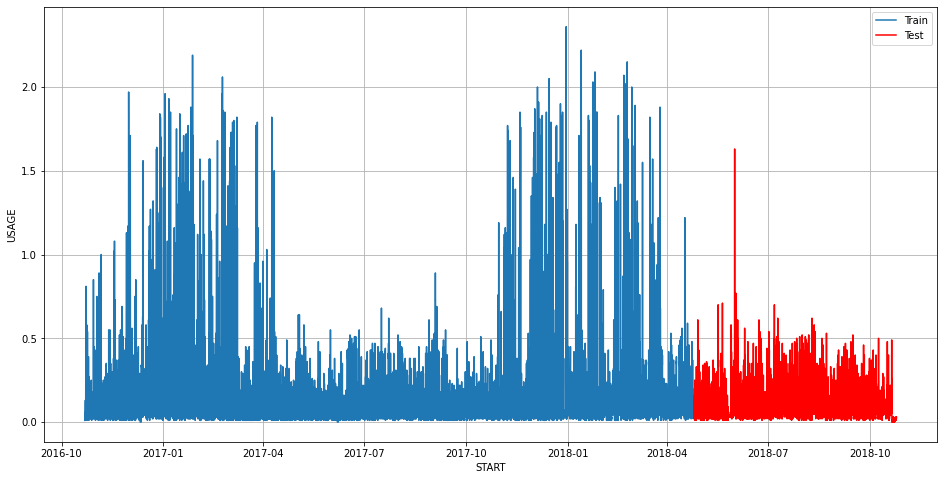

In [62]:
# ANALYSIS FOR 75% OF DATASET AS TRAIN DATA
training_data75, val_data75, test_data75 = get_train_val_test(75, True)
visualise_test_train(training_data75, test_data75)

In [63]:
rfr, x_train75,y_train75,x_test75,y_test75,x_val75,y_val75,x_train_scaled75,x_test_scaled75,x_val_scaled75 = apply_random_forest(training_data75, val_data75, test_data75)
rfr.fit(x_train_scaled75,y_train75)

       COST  DAY_TYPE  IS_HOLIDAY
0      0.00         0           0
1      0.00         0           0
2      0.00         0           0
3      0.00         0           0
4      0.00         0           0
...     ...       ...         ...
52699  0.02         0           0
52700  0.01         0           0
52701  0.01         0           0
52702  0.01         0           0
52703  0.01         0           0

[52704 rows x 3 columns]
building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 44 of 100building tree 45 of 100

building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100building tree 53 of 100

building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100building tree 60 of 100

building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-64-6d58e1b505be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data75["RF_PREDICTED"] = rfr.predict(

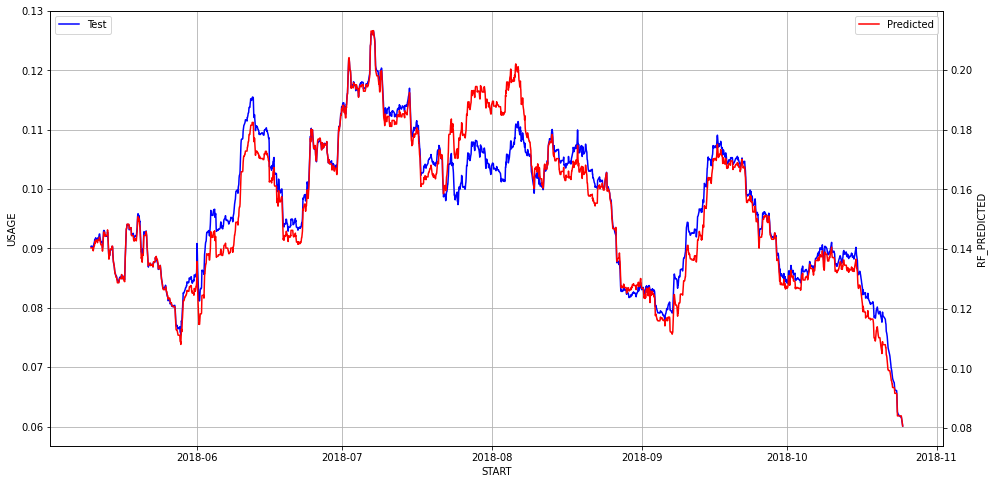

In [64]:
rfr.score(x_val75,y_val75)
rfr.score(x_test75,y_test75)
test_data75["RF_PREDICTED"] = rfr.predict(x_test_scaled75)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data75["START"], y = test_data75["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data75["START"], y = test_data75["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-65-e67d28185686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data75["RF_PREDICTED"] = rfr.predict(x_val_scaled75)


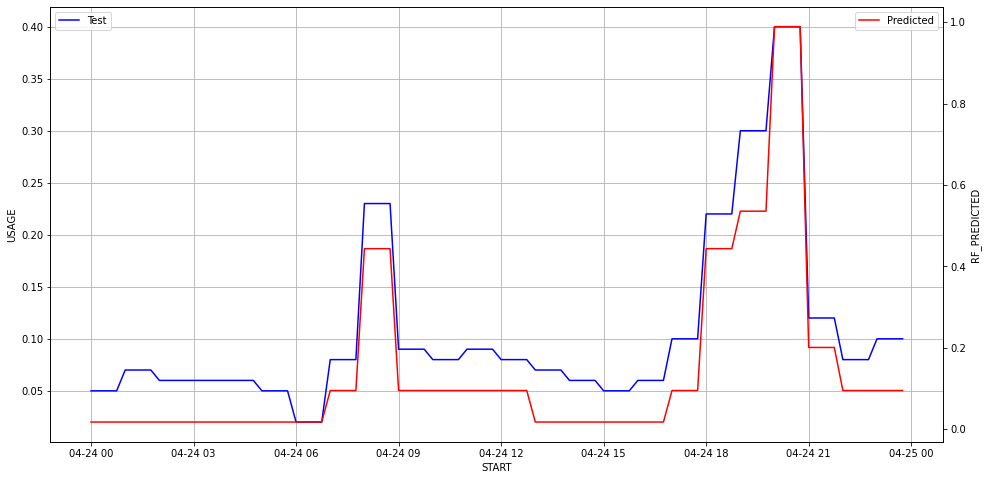

In [65]:
val_data75["RF_PREDICTED"] = rfr.predict(x_val_scaled75)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data75["START"], y = val_data75["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data75["START"], y = val_data75["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [66]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data75.USAGE, test_data75.RF_PREDICTED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data75.USAGE, val_data75.RF_PREDICTED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data75.USAGE, test_data75.RF_PREDICTED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data75.USAGE, val_data75.RF_PREDICTED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data75.USAGE, test_data75.RF_PREDICTED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data75.USAGE, val_data75.RF_PREDICTED))

RMSE FOR TESTDATA 0.13538262964499143
RMSE FOR SINGLE TEST HORIZON 0.14763863482304282
MAE FOR TESTDATA 0.07728922596133184
MAE FOR SINGLE TEST HORIZON 0.07662290474989594
MAPE FOR TESTDATA 362210549545.2582
MAPE FOR SINGLE TEST HORIZON 0.5386622977132159


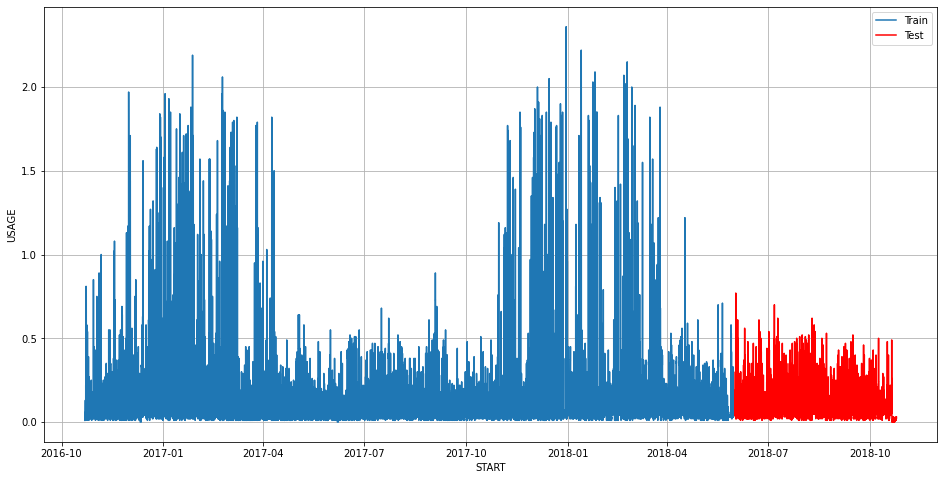

In [67]:
# ANALYSIS FOR 80% OF DATASET AS TRAIN DATA
training_data80, val_data80, test_data80 = get_train_val_test(80, True)
visualise_test_train(training_data80, test_data80)

In [68]:
rfr, x_train80,y_train80,x_test80,y_test80,x_val80,y_val80,x_train_scaled80,x_test_scaled80,x_val_scaled80 = apply_random_forest(training_data80, val_data80, test_data80)
rfr.fit(x_train_scaled80,y_train80)

       COST  DAY_TYPE  IS_HOLIDAY
0      0.00         0           0
1      0.00         0           0
2      0.00         0           0
3      0.00         0           0
4      0.00         0           0
...     ...       ...         ...
56251  0.02         0           0
56252  0.01         0           0
56253  0.01         0           0
56254  0.01         0           0
56255  0.01         0           0

[56256 rows x 3 columns]
building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100building tree 68 of 100

building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100building tree 76 of 100

building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100building tree 81 of 100

building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-69-ba4f9d208455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data80["RF_PREDICTED"] = rfr.predict(

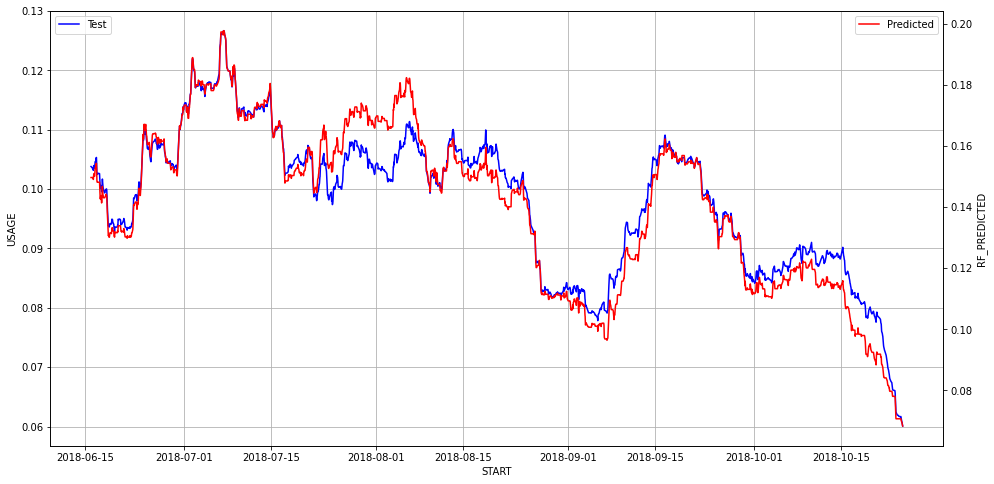

In [69]:
rfr.score(x_val80,y_val80)
rfr.score(x_test80,y_test80)
test_data80["RF_PREDICTED"] = rfr.predict(x_test_scaled80)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data80["START"], y = test_data80["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data80["START"], y = test_data80["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-70-c05793704fd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data80["RF_PREDICTED"] = rfr.predict(x_val_scaled80)


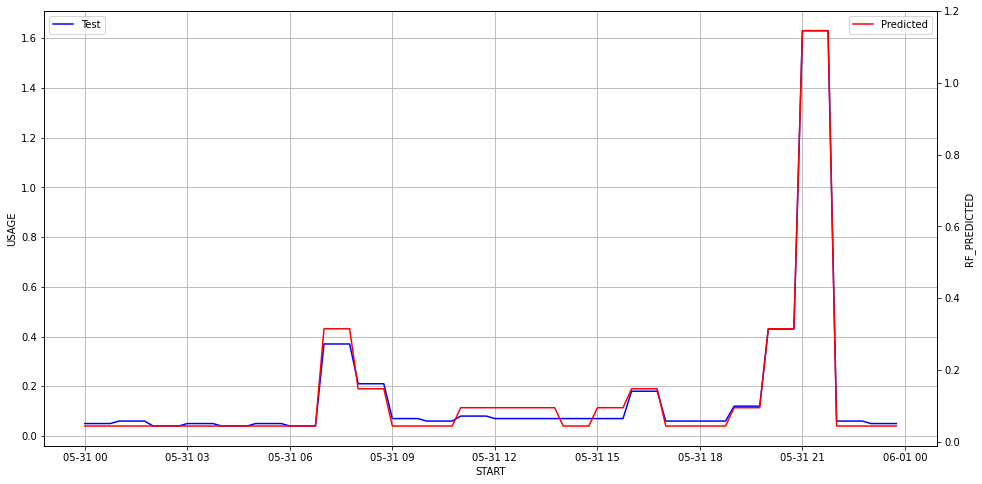

In [70]:
val_data80["RF_PREDICTED"] = rfr.predict(x_val_scaled80)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data80["START"], y = val_data80["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data80["START"], y = val_data80["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [71]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data80.USAGE, test_data80.RF_PREDICTED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data80.USAGE, val_data80.RF_PREDICTED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data80.USAGE, test_data80.RF_PREDICTED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data80.USAGE, val_data80.RF_PREDICTED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data80.USAGE, test_data80.RF_PREDICTED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data80.USAGE, val_data80.RF_PREDICTED))

RMSE FOR TESTDATA 0.13169860461064728
RMSE FOR SINGLE TEST HORIZON 0.10449210418360853
MAE FOR TESTDATA 0.06645769352783291
MAE FOR SINGLE TEST HORIZON 0.04318623455148588
MAPE FOR TESTDATA 454356722484.9614
MAPE FOR SINGLE TEST HORIZON 0.2313694859873577


In [72]:
# LSTM

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [82]:
def apply_lstm(training_data, val_data, test_data):
    model_k = Sequential()
    model_k.add(LSTM(1, input_shape=(1,3)))
    model_k.add(Dense(1))
    model_k.compile(loss='mean_squared_error', optimizer='adam')
    x_train,y_train = training_data.drop(["USAGE", "START", "END", "year", "month", "day", "hour", "duration"],axis=1), training_data.USAGE
    x_test,y_test = test_data.drop(["USAGE", "START", "END", "year", "month", "day", "hour", "duration"],axis=1), test_data.USAGE
    x_val,y_val = val_data.drop(["USAGE", "START", "END", "year", "month", "day", "hour", "duration"],axis=1), val_data.USAGE
    print(y_val.head())
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    x_val_scaled = scaler.fit_transform(x_val)

    return x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled

In [83]:
# ANALYSIS FOR 66% OF DATASET AS TRAIN DATA
training_data, val_data, test_data = get_train_val_test(66, True)
# training_data
x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(training_data, val_data, test_data)

46372    0.05
46373    0.05
46374    0.05
46375    0.05
46376    0.07
Name: USAGE, dtype: float64


In [85]:
x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
print(x_t_reshaped)

[[[-0.54126027 -0.40837154  0.        ]]

 [[-0.54126027 -0.40837154  0.        ]]

 [[-0.54126027 -0.40837154  0.        ]]

 ...

 [[-0.32850548 -0.40837154  0.        ]]

 [[-0.32850548 -0.40837154  0.        ]]

 [[-0.32850548 -0.40837154  0.        ]]]


In [ ]:
history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=10, batch_size=96, verbose=2)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
test_data66["DL_PRED"] = res

In [ ]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data66["START"], y = test_data66["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data66["START"], y = test_data66["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = test_data66["START"], y = test_data66["DL_PRED"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
val_data66["DL_PRED"] = res

In [ ]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data66["START"], y = val_data66["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data66["START"], y = val_data66["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = val_data66["START"], y = val_data66["DL_PRED"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data66.USAGE, test_data66.DL_PRED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data66.USAGE, val_data66.DL_PRED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data66.USAGE, test_data66.DL_PRED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data66.USAGE, val_data66.DL_PRED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data66.USAGE, test_data66.DL_PRED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data66.USAGE, val_data66.DL_PRED))

In [ ]:
# ANALYSIS FOR 70% OF DATASET AS TRAIN DATA
training_data, val_data, test_data = get_train_val_test(70, True)
x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(training_data, val_data, test_data)

x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))

history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=10, batch_size=96, verbose=2)


In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
test_data70["DL_PRED"] = res

fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data70["START"], y = test_data70["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data70["START"], y = test_data70["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = test_data70["START"], y = test_data70["DL_PRED"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
val_data70["DL_PRED"] = res

In [ ]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data70["START"], y = val_data70["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data70["START"], y = val_data70["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = val_data70["START"], y = val_data70["DL_PRED"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data70.USAGE, test_data70.DL_PRED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data70.USAGE, val_data70.DL_PRED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data70.USAGE, test_data70.DL_PRED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data70.USAGE, val_data70.DL_PRED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data70.USAGE, test_data70.DL_PRED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data70.USAGE, val_data70.DL_PRED))

In [ ]:
# ANALYSIS FOR 75% OF DATASET AS TRAIN DATA
training_data, val_data, test_data = get_train_val_test(75, True)
x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(training_data, val_data, test_data)

x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))

history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=10, batch_size=96, verbose=2)


In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
test_data75["DL_PRED"] = res

fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data75["START"], y = test_data75["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data75["START"], y = test_data75["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = test_data75["START"], y = test_data75["DL_PRED"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
val_data75["DL_PRED"] = res

fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data75["START"], y = val_data75["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data75["START"], y = val_data75["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = val_data75["START"], y = val_data75["DL_PRED"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data75.USAGE, test_data75.DL_PRED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data75.USAGE, val_data75.DL_PRED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data75.USAGE, test_data75.DL_PRED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data75.USAGE, val_data75.DL_PRED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data75.USAGE, test_data75.DL_PRED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data75.USAGE, val_data75.DL_PRED))

In [ ]:
# ANALYSIS FOR 80% OF DATASET AS TRAIN DATA
training_data, val_data, test_data = get_train_val_test(80, True)
x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(training_data, val_data, test_data)

x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))

history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=10, batch_size=96, verbose=2)


In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
test_data80["DL_PRED"] = res

fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = test_data80["START"], y = test_data80["USAGE"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = test_data80["START"], y = test_data80["RF_PREDICTED"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = test_data80["START"], y = test_data80["DL_PRED"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
val_data80["DL_PRED"] = res

fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = val_data80["START"], y = val_data80["USAGE"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = val_data80["START"], y = val_data80["RF_PREDICTED"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = val_data80["START"], y = val_data80["DL_PRED"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [ ]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(test_data80.USAGE, test_data80.DL_PRED)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(val_data80.USAGE, val_data80.DL_PRED)))

print('MAE FOR TESTDATA', mean_absolute_error(test_data80.USAGE, test_data80.DL_PRED))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(val_data80.USAGE, val_data80.DL_PRED))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(test_data80.USAGE, test_data80.DL_PRED))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(val_data80.USAGE, val_data80.DL_PRED))